In [81]:
# data analysis and wrangling

import pandas as pd
import numpy as np


# visualization
import matplotlib.pyplot as plt
import seaborn as sn

import warnings 
warnings.filterwarnings('ignore')

# machine learning
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [82]:
df=pd.read_csv('Avocado.csv')
df.head()


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [ ]:
# dropping Unnamed column

In [83]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [84]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16468 entries, 0 to 16467
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1517 non-null   object 
 1   AveragePrice  1517 non-null   float64
 2   Total Volume  1517 non-null   float64
 3   4046          1517 non-null   float64
 4   4225          1517 non-null   float64
 5   4770          1517 non-null   float64
 6   Total Bags    1517 non-null   float64
 7   Small Bags    1517 non-null   float64
 8   Large Bags    1517 non-null   float64
 9   XLarge Bags   1517 non-null   float64
 10  type          1517 non-null   object 
 11  year          1517 non-null   float64
 12  region        1517 non-null   object 
dtypes: float64(10), object(3)
memory usage: 1.6+ MB


In [86]:
df.shape

(16468, 13)

In [87]:
df.isnull().sum()

Date            14951
AveragePrice    14951
Total Volume    14951
4046            14951
4225            14951
4770            14951
Total Bags      14951
Small Bags      14951
Large Bags      14951
XLarge Bags     14951
type            14951
year            14951
region          14951
dtype: int64

In [88]:
df.dtypes


Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year            float64
region           object
dtype: object

In [89]:
# to convert date, into day and month, year is already given in data set

df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].apply(lambda x:x.month)
df['Day']=df['Date'].apply(lambda x:x.day)

In [90]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany,12.0,27.0
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany,12.0,20.0
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany,12.0,13.0
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany,6.0,12.0
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany,11.0,29.0


In [91]:
# now dropping Date from dataset

df.drop('Date',axis=1,inplace=True)

In [92]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany,12.0,27.0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany,12.0,20.0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany,12.0,13.0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany,6.0,12.0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany,11.0,29.0


In [93]:
cor=df.corr()

In [94]:
cor

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
AveragePrice,1.000000,-0.140470,-0.190096,-0.092084,-0.100567,-0.111597,-0.097682,-0.177480,-0.048284,0.178683,0.060642,0.092589
Total Volume,-0.140470,1.000000,0.985568,0.987154,0.934347,0.967689,0.960642,0.910226,0.521717,-0.004189,-0.055212,-0.034857
4046,-0.190096,0.985568,1.000000,0.951952,0.898570,0.930395,0.922278,0.884229,0.474063,-0.040439,-0.053007,-0.031806
4225,-0.092084,0.987154,0.951952,1.000000,0.927757,0.951779,0.943988,0.900496,0.504718,-0.007254,-0.058429,-0.044008
4770,-0.100567,0.934347,0.898570,0.927757,1.000000,0.926405,0.923607,0.840523,0.646053,0.029222,-0.055079,-0.021318
Total Bags,-0.111597,0.967689,0.930395,0.951779,0.926405,1.000000,0.997341,0.911336,0.601856,0.090108,-0.047747,-0.021137
Small Bags,-0.097682,0.960642,0.922278,0.943988,0.923607,0.997341,1.000000,0.879131,0.611300,0.106382,-0.048978,-0.016462
Large Bags,-0.177480,0.910226,0.884229,0.900496,0.840523,0.911336,0.879131,1.000000,0.447779,-0.018678,-0.039242,-0.046578
XLarge Bags,-0.048284,0.521717,0.474063,0.504718,0.646053,0.601856,0.611300,0.447779,1.000000,0.218342,0.021452,0.019315
year,0.178683,-0.004189,-0.040439,-0.007254,0.029222,0.090108,0.106382,-0.018678,0.218342,1.000000,-0.013144,0.029744


In [95]:
# not getting much inference from crrelation comparing average price vis a vis other features

<AxesSubplot:>

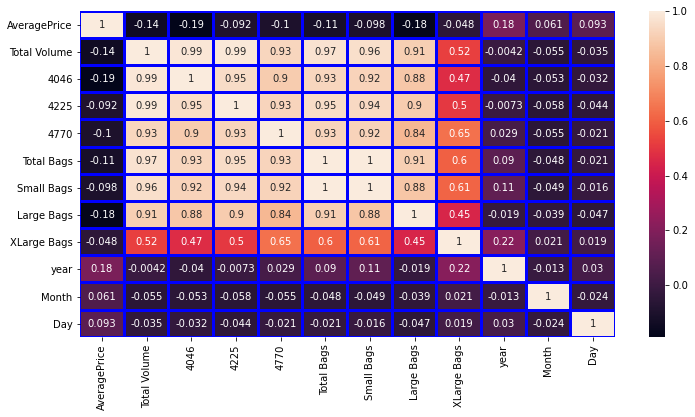

In [96]:
plt.figure(figsize=(12,6))
sn.heatmap(cor,annot=True,linewidth=2,linecolor='blue')

In [97]:
# working on categorical data as 'type' and 'region'

df['type'].nunique()

1

In [98]:
df['region'].nunique()

51

In [99]:
df['region'].value_counts()

California             76
Albany                 67
Boise                  65
BaltimoreWashington    65
Boston                 62
Atlanta                54
PhoenixTucson          52
BuffaloRochester       51
Spokane                49
Columbus               47
NewYork                44
Jacksonville           41
Detroit                40
SouthCentral           39
SanDiego               38
West                   36
Tampa                  34
Louisville             34
Charlotte              31
Portland               30
NorthernNewEngland     29
Houston                29
WestTexNewMexico       27
TotalUS                25
Nashville              25
SouthCarolina          24
Denver                 24
Chicago                23
GrandRapids            23
Pittsburgh             22
RichmondNorfolk        21
Orlando                21
Syracuse               19
HarrisburgScranton     19
GreatLakes             18
Midsouth               18
MiamiFtLauderdale      17
Roanoke                17
DallasFtWort

In [100]:
# there is only one type i.e.conventional,and 51 regions, which is not going to create any effect on pricing prediction, so decided to drop type and region columns

df.drop('type',axis=1,inplace=True)
df.drop('region',axis=1,inplace=True)

In [101]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015.0,12.0,27.0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015.0,12.0,20.0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015.0,12.0,13.0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015.0,6.0,12.0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015.0,11.0,29.0


In [102]:
collist=df.columns.values
ncol=12
nrows=10

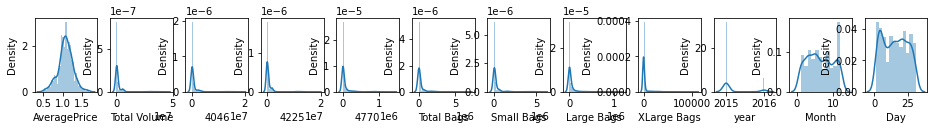

In [103]:
# snapshot of distribution curves of all input datas

plt.figure(figsize=(16,16))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sn.distplot(df[collist[i]])

<AxesSubplot:>

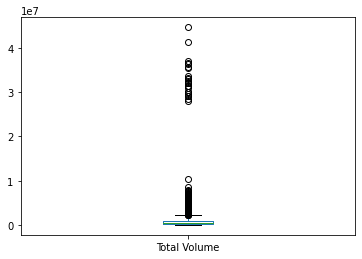

In [104]:
df['Total Volume'].plot.box()

<AxesSubplot:>

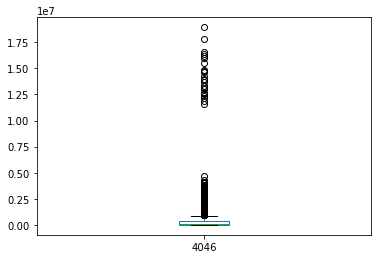

In [105]:
df['4046'].plot.box()

<AxesSubplot:>

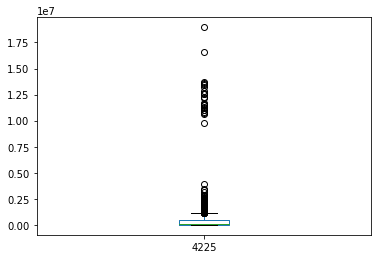

In [106]:
df['4225'].plot.box()

<AxesSubplot:>

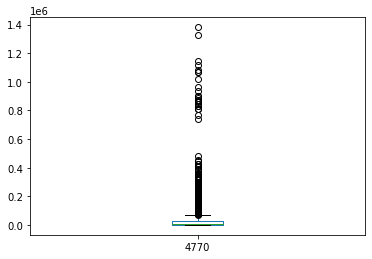

In [107]:
df['4770'].plot.box()

<AxesSubplot:>

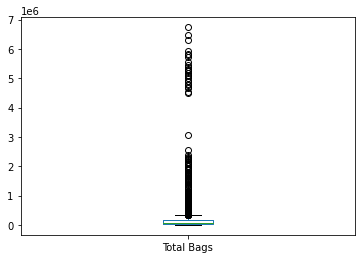

In [108]:
df['Total Bags'].plot.box()

<AxesSubplot:>

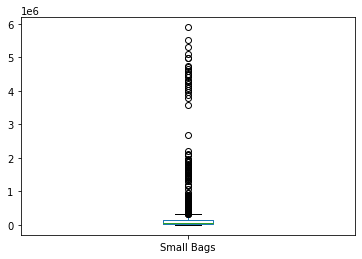

In [109]:
df['Small Bags'].plot.box()

<AxesSubplot:>

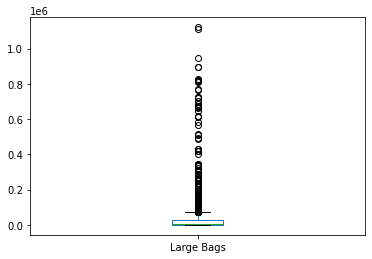

In [110]:
df['Large Bags'].plot.box()

<AxesSubplot:>

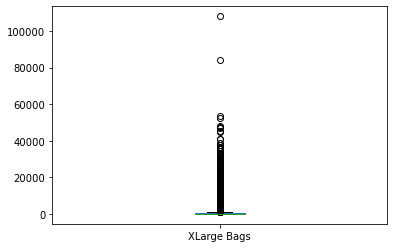

In [111]:
df['XLarge Bags'].plot.box()

<AxesSubplot:>

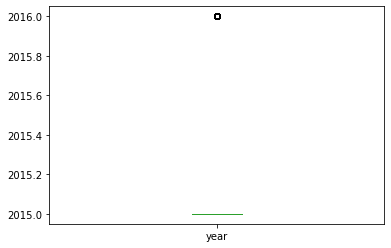

In [112]:
df['year'].plot.box()

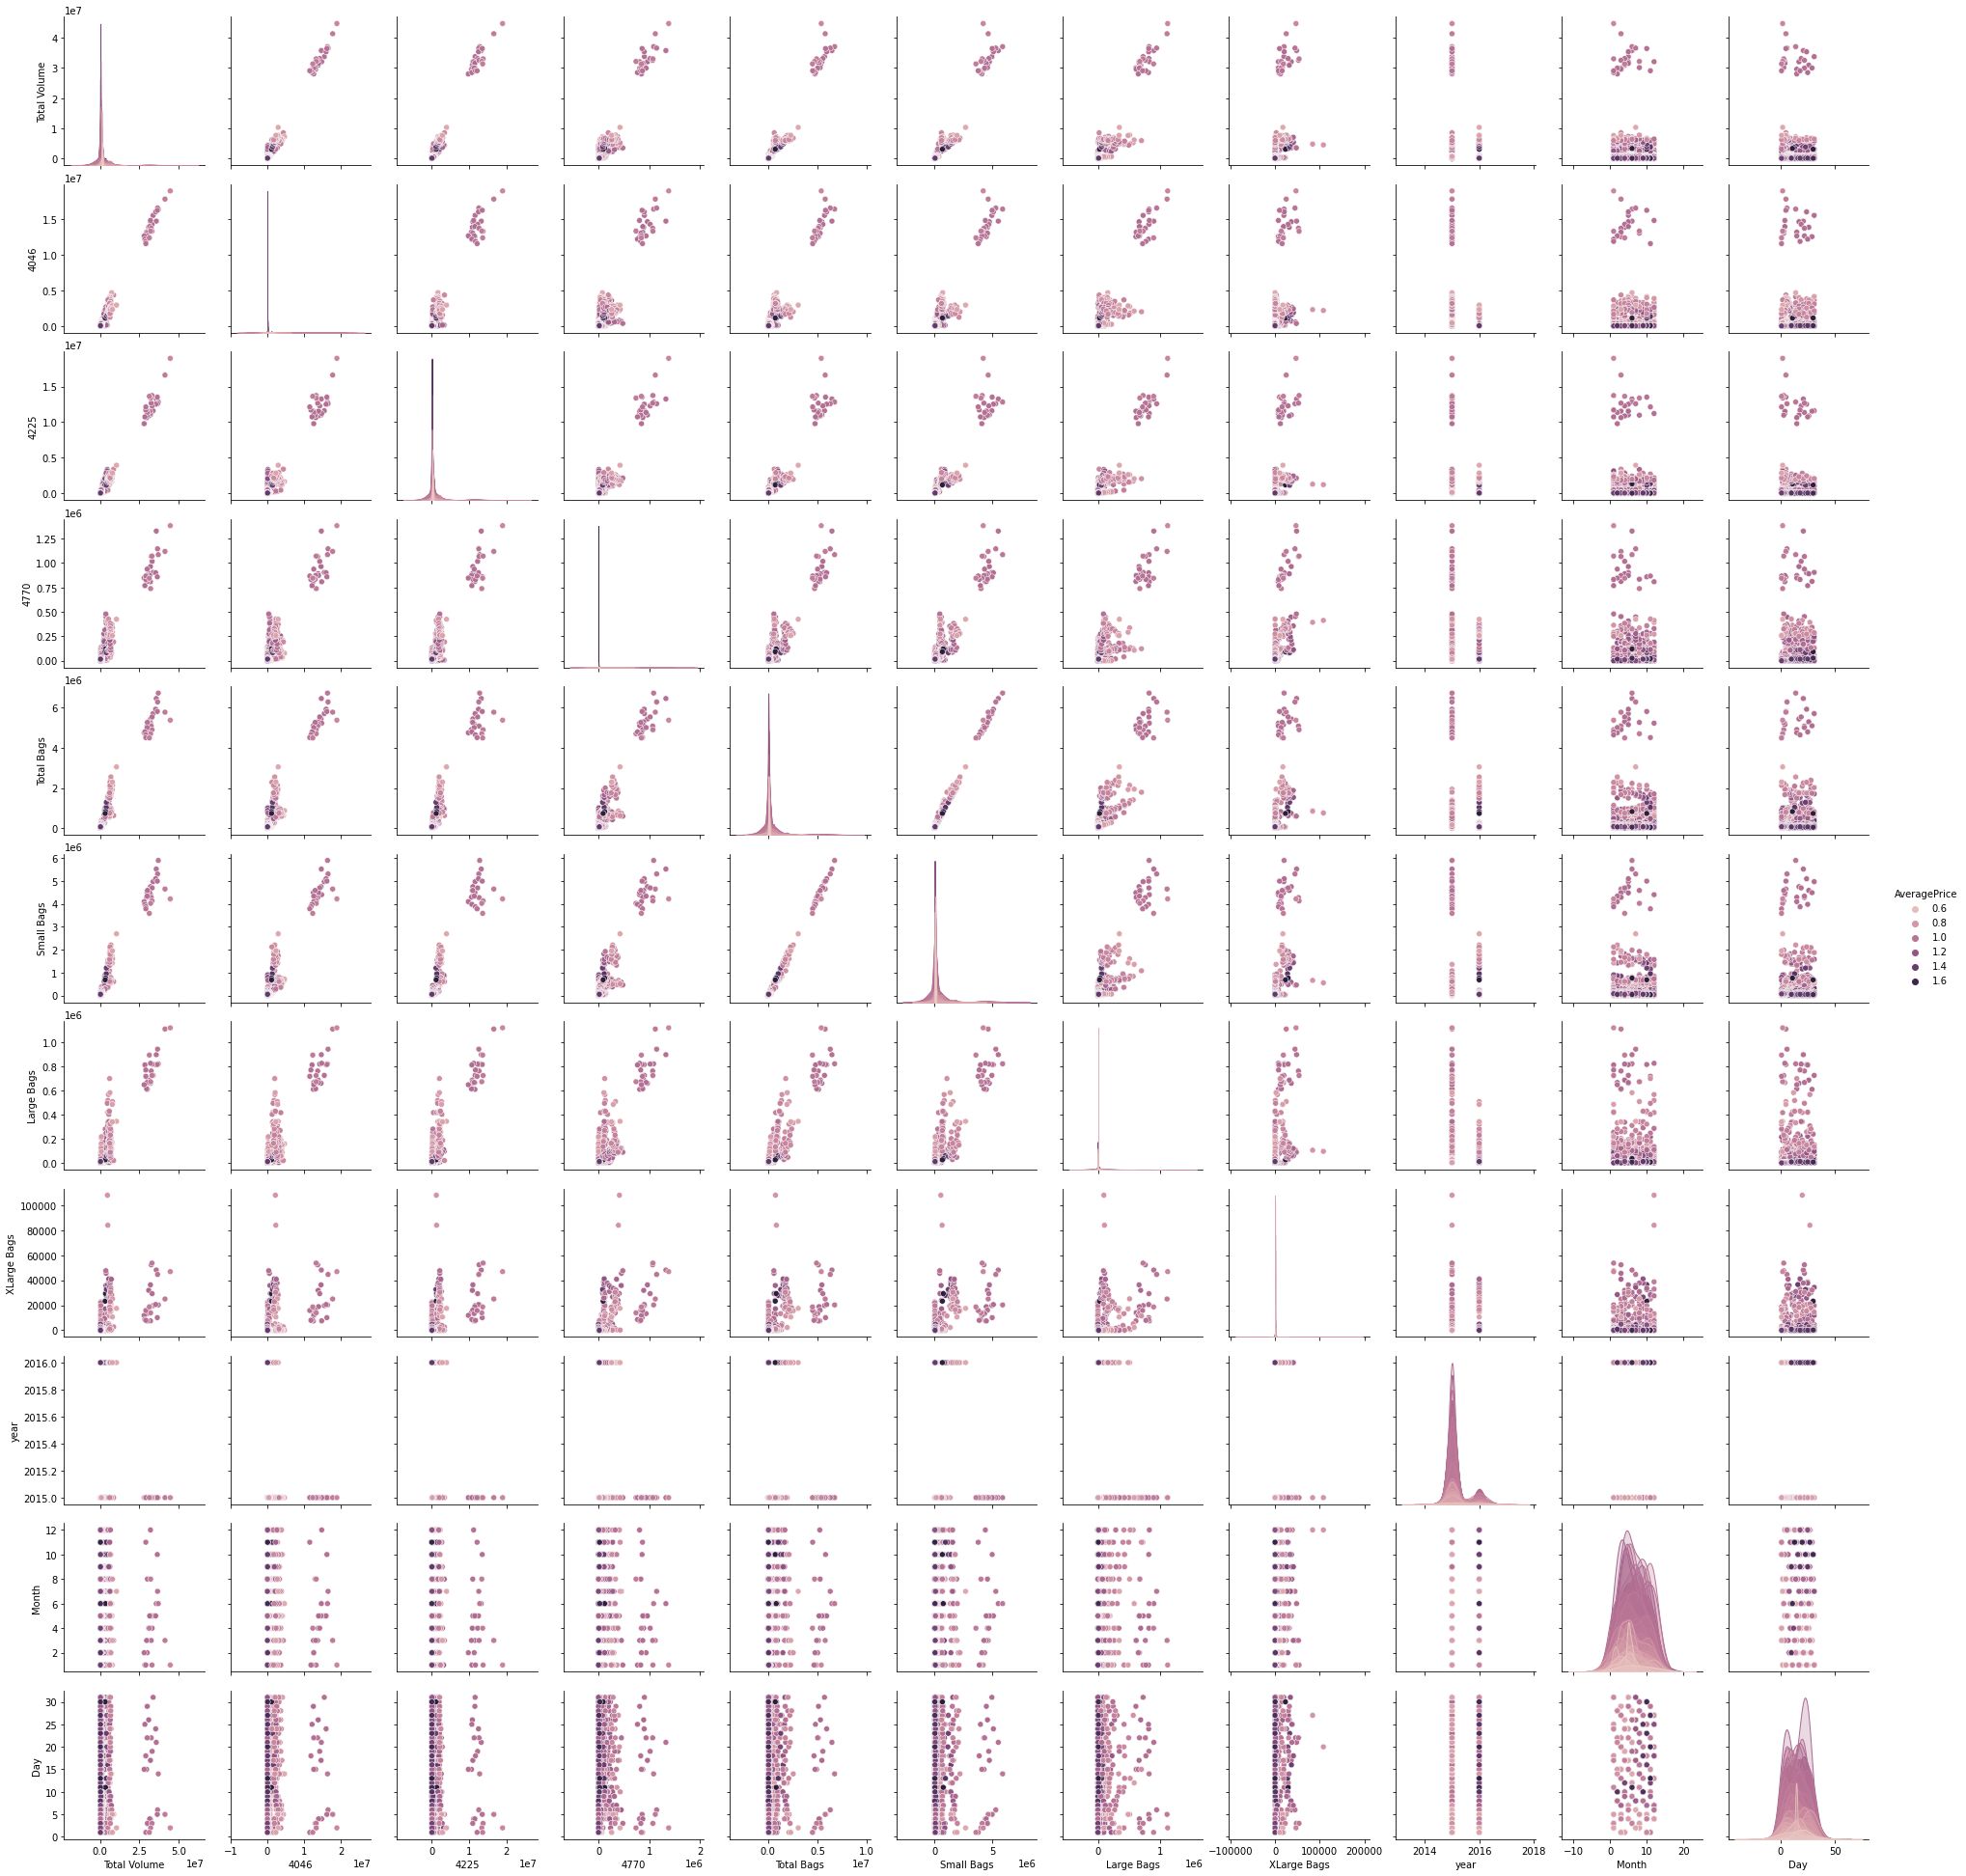

In [113]:
#Multivariate Analysis

sn.pairplot(df,hue='AveragePrice')

In [114]:
df.skew()

AveragePrice   -0.109444
Total Volume    6.200138
4046            6.051830
4225            6.394926
4770            5.405164
Total Bags      5.366378
Small Bags      5.355185
Large Bags      5.144495
XLarge Bags     5.775077
year            1.828332
Month           0.101439
Day             0.041303
dtype: float64

In [115]:
df.isnull().sum()

AveragePrice    14951
Total Volume    14951
4046            14951
4225            14951
4770            14951
Total Bags      14951
Small Bags      14951
Large Bags      14951
XLarge Bags     14951
year            14951
Month           14951
Day             14951
dtype: int64

In [116]:
# to manage missing value, average price,day and month with no skewness so replacing with mean, rest all with median

In [117]:
df['Total Volume']=df['Total Volume'].fillna(df['Total Volume'].median())
df['4046']=df['4046'].fillna(df['4046'].median())
df['4225']=df['4225'].fillna(df['4225'].median())
df['4770']=df['4770'].fillna(df['4770'].median())
df['Total Bags']=df['Total Bags'].fillna(df['Total Bags'].median())
df['Small Bags']=df['Small Bags'].fillna(df['Small Bags'].median())
df['Large Bags']=df['Large Bags'].fillna(df['Large Bags'].median())
df['XLarge Bags']=df['XLarge Bags'].fillna(df['XLarge Bags'].median())
df['year']=df['year'].fillna(df['year'].median())


In [118]:
df['AveragePrice']=df['AveragePrice'].fillna(df['AveragePrice'].mean())
df['Day']=df['Day'].fillna(df['Day'].mean())
df['Month']=df['Month'].fillna(df['Month'].mean())

In [119]:
df.isnull().sum()

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
year            0
Month           0
Day             0
dtype: int64

In [120]:
df.shape

(16468, 12)

In [121]:
# to remove outliers from dataset

from scipy.stats import zscore
z=np.abs(zscore(df))
new_df=df[(z<3).all(axis=1)]

In [122]:
new_df.shape

(15151, 12)

In [123]:
# total data loss is 8% so we can remove outlier

In [124]:
# Model building and training

x=df.drop('AveragePrice',axis=1)
y=df['AveragePrice']

In [125]:
x

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
0,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015.0,12.000000,27.00000
1,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015.0,12.000000,20.00000
2,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015.0,12.000000,13.00000
3,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015.0,6.000000,12.00000
4,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015.0,11.000000,29.00000
...,...,...,...,...,...,...,...,...,...,...,...
16463,402791.86,81751.17,118664.89,7688.17,73979.06,62375.69,5044.35,0.0,2015.0,6.362558,15.25379
16464,402791.86,81751.17,118664.89,7688.17,73979.06,62375.69,5044.35,0.0,2015.0,6.362558,15.25379
16465,402791.86,81751.17,118664.89,7688.17,73979.06,62375.69,5044.35,0.0,2015.0,6.362558,15.25379
16466,402791.86,81751.17,118664.89,7688.17,73979.06,62375.69,5044.35,0.0,2015.0,6.362558,15.25379


In [126]:
y

0        1.33000
1        1.35000
2        0.93000
3        1.08000
4        1.28000
          ...   
16463    1.07499
16464    1.07499
16465    1.07499
16466    1.07499
16467    1.07499
Name: AveragePrice, Length: 16468, dtype: float64

In [127]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [128]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)
x_train,x_valid,y_train,y_valid=train_test_split(x_train,y_train,random_state=1)
print("size of training set:{},size of validation set:{},size of test set:"
      "{}\n".format(x_train.shape,x_valid.shape,x_test.shape))

size of training set:(9263, 11),size of validation set:(3088, 11),size of test set:(4117, 11)



In [129]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)

In [130]:
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,pred))
print('MSE:',metrics.mean_squared_error(y_test,pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

MAE: 0.011836564621224064
MSE: 0.002758629866240925
RMSE: 0.052522660502310095


In [131]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred=dtr.predict(x_test)

In [132]:
print('MAE:',metrics.mean_absolute_error(y_test,pred))
print('MSE:',metrics.mean_squared_error(y_test,pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

MAE: 0.00856691765860701
MSE: 0.0018158610638814672
RMSE: 0.042612921325361715


In [133]:
from sklearn.ensemble import RandomForestRegressor
rdr=RandomForestRegressor()
rdr.fit(x_train,y_train)
pred=rdr.predict(x_test)

In [134]:
print('MAE:',metrics.mean_absolute_error(y_test,pred))
print('MSE:',metrics.mean_squared_error(y_test,pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

MAE: 0.0063869079907750296
MSE: 0.0009742655411581083
RMSE: 0.031213227022499745


In [ ]:
# compared to linear regression,Decision tree and random forest, RMSE value is less with Random Forest so Random Forest is the suited model

In [135]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
parameters={'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]}
rdr=RandomForestRegressor()
clf=GridSearchCV(rdr,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'log2'}


In [136]:
rdr=RandomForestRegressor(criterion='mse',max_features="log2")
rdr.fit(x_train,y_train)
rdr.score(x_train,y_train)
pred_decision=rdr.predict(x_test)
rfs=r2_score(y_test,pred_decision)
print('R2 Score:',rfs*100)
rdrscore=cross_val_score(rdr,x,y,cv=5)
rfc=rdrscore.mean()
print('cross val score:',rfc*100)

R2 Score: 74.72648588964377
cross val score: -8317439.999999999


In [137]:
# Saving the model
import joblib
joblib.dump(rfc,"Avocadoprice.pkl")

['Avocadoprice.pkl']